In [31]:
import numpy as np
import pandas as pd

sound_data = pd.read_csv('datasets/jrelabeled1298.csv')
rogans = sound_data[sound_data['label2'] == 1]
elons = sound_data[sound_data['label2'] == 0]
X = rogans.drop(['filename', 'label', 'label2'], axis=1)
y = rogans['label2']
X.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.370643  0.060327        2311.597408         1842.221912  4046.746826   
1     0.334566  0.049869        1939.228643         2043.361318  3735.312907   
2     0.349033  0.037965        1853.812744         1790.238071  3456.477865   
3     0.352053  0.048932        2170.699733         1890.509107  3965.598551   
4     0.349883  0.048066        1572.637537         1701.640398  2895.817057   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.141018 -244.242737  101.293144 -26.639498  17.342655  ...   
1            0.081312 -311.681519   95.534386  -9.830963  48.357574  ...   
2            0.091679 -288.414154  126.246300 -12.794884  31.075195  ...   
3            0.120795 -289.390564   98.574074 -11.574970  35.215202  ...   
4            0.073938 -297.128540  137.961060 -21.671207  10.192625  ...   

     mfcc11     mfcc12     mfcc13    mfcc14     mfcc15    mfcc16     mfcc17  \
0  0.350607  -7.042977 -17.581421  0.219237 -15.416845 -2.527660  -6.503064   
1 -5.144281  -6.632302 -21.340956 -0.276192  -9.889625 -7.471118  -8.896070   
2 -2.302557  -2.478554 -12.223885  2.816964  -8.079397 -3.590029  -8.260034   
3 -1.357548 -10.602680 -19.094336  1.818855  -9.331707 -2.967143 -12.409453   
4 -5.132926  -8.207225 -10.068391  1.245310 -10.639617 -0.519561  -4.097899   

     mfcc18     mfcc19    mfcc20  
0 -7.859387 -11.159444 -1.384048  
1 -5.014895  -4.136333 -4.388417  
2 -4.544590  -6.480252 -5.387292  
3 -6.876427  -4.118853 -3.872151  
4 -4.806003  -8.309758  0.091142  

[5 rows x 26 columns]

In [32]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE

st_scaler = StandardScaler()
X = st_scaler.fit_transform(X)
elonx = st_scaler.transform(elons.drop(['filename', 'label', 'label2'], axis=1))

efeatures = TSNE(n_components=2).fit_transform(X)

reduced_data = pd.DataFrame(efeatures, columns=['x1', 'x2'])
reduced_data['label'] = y

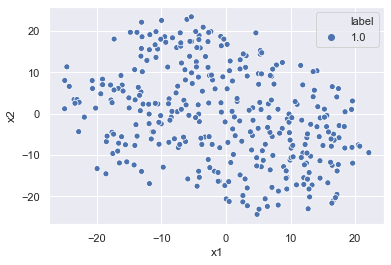

In [33]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.scatterplot(x='x1', y='x2', hue='label', data=reduced_data)

# OneClassSVM

In [34]:
from sklearn.svm import OneClassSVM

ocs_clf = OneClassSVM(kernel='rbf', nu=0.025) # assuming that 2.5% of the data are outliers
ocs_clf.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.025, shrinking=True, tol=0.001, verbose=False)

In [35]:
pd.Series(ocs_clf.predict(X)).value_counts()

 1    609
-1     40
dtype: int64

In [37]:
pd.Series(ocs_clf.predict(elonx)).value_counts()

-1    649
dtype: int64

In [42]:
climate_data = pd.read_csv('datasets/climate2500.csv').drop('label', axis=1)
climate_X = st_scaler.transform(climate_data.drop('filename', axis=1))

In [45]:
pd.Series(ocs_clf.predict(climate_X)).value_counts()

-1    91
 1    25
dtype: int64

In [52]:
dmt_data = pd.read_csv('datasets/rogandmt_dataset.csv').drop('label', axis=1)
dmt_X = st_scaler.transform(dmt_data.drop('filename', axis=1))
dmt_data['label'] = ocs_clf.predict(dmt_X)
pd.Series(ocs_clf.predict(dmt_X)).value_counts()

-1    77
 1    42
dtype: int64

In [56]:
import librosa
import IPython.display as ipd

for n in list(dmt_data[dmt_data['label'] == 1]['filename'])[:5]:

    audio = f'audio/rogandmt/{n}'
    print(f'{audio}')
    ipd.display(ipd.Audio(audio))

audio/rogandmt/rogandmt1.wav


audio/rogandmt/rogandmt106.wav


audio/rogandmt/rogandmt107.wav


audio/rogandmt/rogandmt109.wav


audio/rogandmt/rogandmt110.wav
